In [23]:
# Load ADNI model

import pickle

adni = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/weightsBalanced3.pkl', 'rb'))
# adni = {'coef': None, 'intercept': 0}
# adni['coef'] = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/corrBalanced2.pkl', 'rb'))


list(adni.keys())

['intercept', 'coef']

/tmp/ipykernel_440443/2955131202.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_440443/2955131202.py:99: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


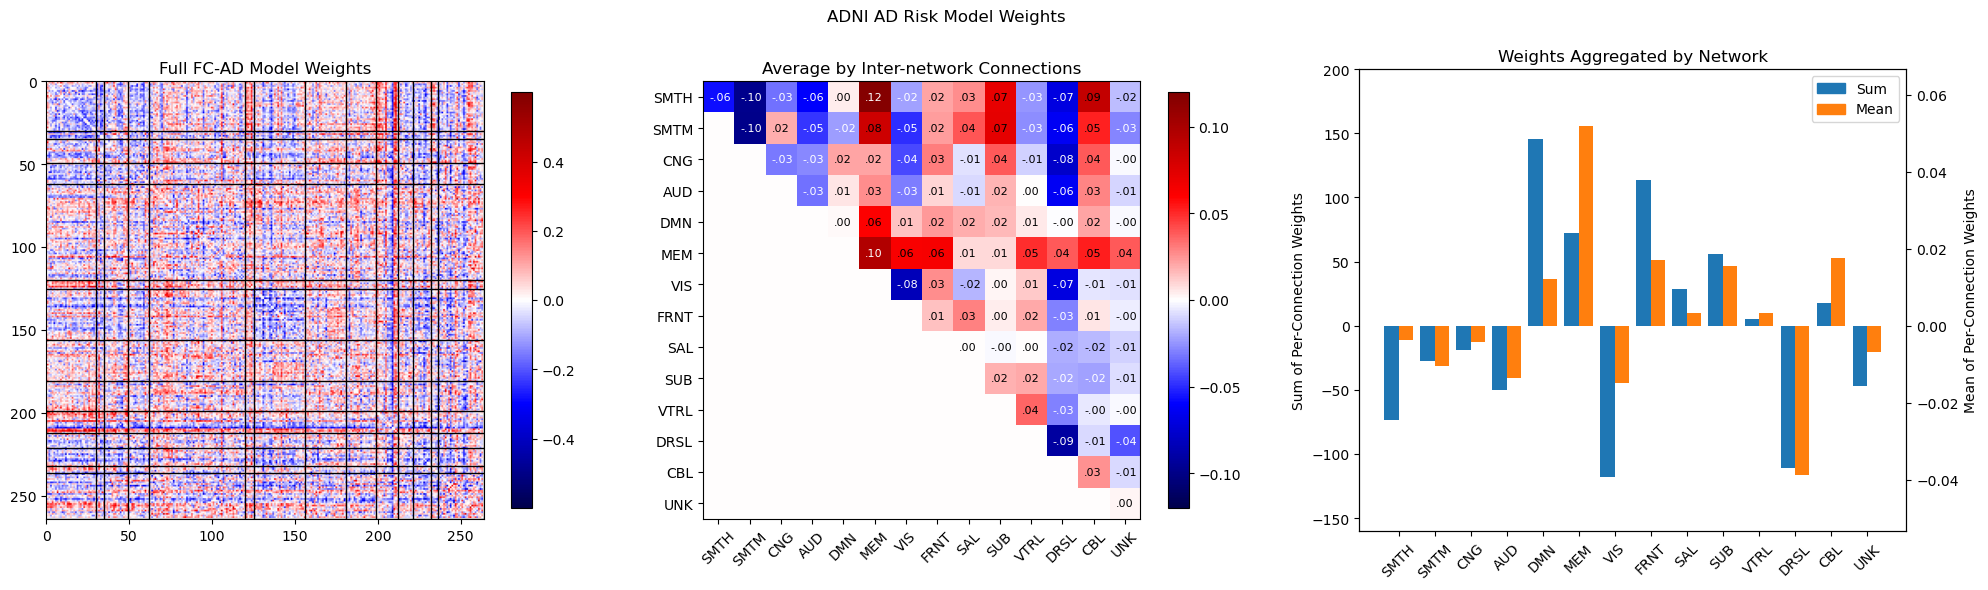

In [68]:
import numpy as np
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt

divis = [0,30,35,49,62,120,125,156,181,199,212,221,232,236,264]
labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def getlabel(i):
    for j in range(len(divis)):
        if i >= divis[j] and i < divis[j+1]:
            return labels[j]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def formatFloat(fmt, val):
    ret = fmt.format(val)
    if ret.startswith("0."):
        return ret[1:]
    if ret.startswith("-0."):
        return "-" + ret[2:]
    return ret

w = adni['coef']
W = vec2mat(w)

regs = np.zeros([14,14])
ntwk = np.zeros(14)
ntwk_mean = np.zeros(14)

for i in range(14):
    itop = divis[i]
    ibot = divis[i+1]
    for j in range(14):
        jtop = divis[j]
        jbot = divis[j+1]
        Wsub = W[itop:ibot,jtop:jbot]
        ntwk[i] += np.sum(Wsub)
        ntwk_mean[i] += np.mean(Wsub)/14
        if i > j:
            continue
        regs[i,j] = np.mean(Wsub)

fig, ax = plt.subplots(1,3,figsize=(24,6))

norm1 = TwoSlopeNorm(vmax=0.6, vmin=-0.6, vcenter=0)
norm2 = TwoSlopeNorm(vmax=0.12, vmin=-0.12, vcenter=0)

pos = ax[0].imshow(W, norm=norm1, cmap='seismic')
fig.colorbar(pos, ax=ax[0], shrink=0.9)

pos = ax[1].imshow(regs, norm=norm2, cmap='seismic')
fig.colorbar(pos, ax=ax[1], shrink=0.9)

for i in range(len(divis)-1):
    d = divis[i+1]
    ax[0].plot([0, 264], [d, d], color='black', linewidth=1)
    ax[0].plot([d, d], [0, 264], color='black', linewidth=1)

ax[0].set_xlim([0,264])
ax[0].set_ylim([264,0])

for i in range(14):
    for j in range(14):
        if i >= j:
            num = formatFloat("{:0.2f}", regs[j,i])
            color = 'black'
            if regs[j,i] <= -0.02 or regs[j,i] >= .095:
                color = 'white'
            ax[1].text(i-0.3,j+0.1,num,fontsize=8,color=color)

ax[1].set_yticks(np.arange(14))
ax[1].set_xticks(np.arange(14))
ax[1].set_xticklabels(labels, rotation=45)
ax[1].set_yticklabels(labels)

import matplotlib.patches as mpatches
handles = [mpatches.Patch(color='tab:blue', label='Sum'), 
           mpatches.Patch(color='tab:orange', label='Mean')]

ax[2].set_ylabel('Sum of Per-Connection Weights')
ax[2].set_ylim([-160,200])
ax[2].bar(labels, ntwk, width=-0.4, align='edge', label='Sum')
ax2 = ax[2].twinx()
ax2.bar(labels, ntwk_mean, width=0.4, align='edge', color='tab:orange', label='Mean')
ax2.set_ylim(np.array([-160,200])/3000)
ax2.set_ylabel('Mean of Per-Connection Weights')
ax2.legend(handles=handles)
ax[2].set_xticklabels(labels, rotation=45)

ax[0].set_title('Full FC-AD Model Weights')
ax[1].set_title('Average by Inter-network Connections')
ax[2].set_title('Weights Aggregated by Network')

fig.suptitle('ADNI AD Risk Model Weights')
fig.show()
fig.savefig('/home/anton/Documents/Yale/ADNI/ADBalancedWeights.pdf')

In [67]:
# Get top magnitude AD regions

a,b = np.triu_indices(264,1)
asc = np.argsort(w)
dsc = asc[::-1]
neg_roi = set()
neg_adj = {}
neg_ntwk = {}
pos_roi = set()
pos_adj = {}
pos_ntwk = {}

print('Most negative')
for i in range(10):
    r1 = a[asc[i]]
    r2 = b[asc[i]]
    print(asc[i], r1, r2, getlabel(r1), getlabel(r2), w[asc[i]])
    neg_roi.add(r1)
    neg_roi.add(r2)
    neg_adj[f'{r1},{r2}'] = w[asc[i]]
    neg_ntwk[r1] = getlabel(r1)
    neg_ntwk[r2] = getlabel(r2)

print('Most positive')
for i in range(10):
    r1 = a[dsc[i]]
    r2 = b[dsc[i]]
    print(dsc[i], r1, r2, getlabel(r1), getlabel(r2), w[dsc[i]])
    pos_roi.add(r1)
    pos_roi.add(r2)
    pos_adj[f'{r1},{r2}'] = w[dsc[i]]
    pos_ntwk[r1] = getlabel(r1)
    pos_ntwk[r2] = getlabel(r2)

Most negative
25941 131 135 VIS VIS -0.5099364736231605
20531 95 107 DMN DMN -0.48133484174320057
25945 131 139 VIS VIS -0.47054977271423903
33281 209 260 SUB UNK -0.445066359192153
30334 169 253 FRNT UNK -0.4449708260121308
34347 236 246 UNK UNK -0.44249849916004874
33242 209 221 SUB DRSL -0.4379947069560681
13751 58 209 AUD SUB -0.43010109629660864
25685 129 144 VIS VIS -0.4247868743683048
33246 209 225 SUB DRSL -0.42410330660010287
Most positive
16621 73 124 DMN MEM 0.5086826829485825
16364 71 248 DMN UNK 0.48531932152592894
16639 73 142 DMN VIS 0.4783948607332018
5983 23 211 SMTH SUB 0.4648373344056692
31129 178 247 FRNT UNK 0.4630373783620138
24592 121 151 MEM VIS 0.43535027666459863
7168 28 211 SMTH SUB 0.4343781425165448
8098 32 211 SMTM SUB 0.43286977663667203
32704 200 205 SUB SUB 0.4314326001955936
6697 26 211 SMTH SUB 0.4289683137777464


In [69]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

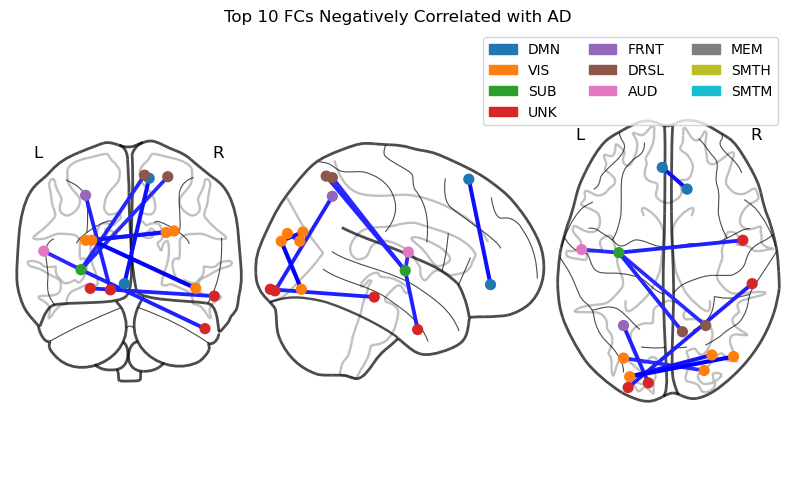

In [70]:
from nilearn import plotting
import nilearn
import matplotlib.patches as mpatches

network_dct = {'DMN': 'tab:blue', 'VIS': 'tab:orange', 'SUB': 'tab:green', 'UNK': 'tab:red', 'FRNT': 'tab:purple', 
               'DRSL': 'tab:brown', 'AUD': 'tab:pink', 'MEM': 'tab:grey', 'SMTH': 'tab:olive', 'SMTM': 'tab:cyan'}

rois = nilearn.datasets.fetch_coords_power_2011()['rois']

nneg = len(neg_roi)
neg_coords = np.zeros((nneg, 3))
neg_roi = list(neg_roi)
neg_adj_mat = np.zeros((nneg, nneg))
neg_colors = [None]*nneg
for k,v in neg_adj.items():
    parts = k.split(',')
    r1 = int(parts[0])
    r2 = int(parts[1])
    i1 = neg_roi.index(r1)
    i2 = neg_roi.index(r2)
    neg_adj_mat[i1,i2] = v
    neg_adj_mat[i2,i1] = v
    c1 = rois.iloc[ours2orig[r1]]
    c2 = rois.iloc[ours2orig[r2]]
    neg_coords[i1] = (c1.x, c1.y, c1.z)
    neg_coords[i2] = (c2.x, c2.y, c2.z)
    neg_colors[i1] = network_dct[neg_ntwk[r1]]
    neg_colors[i2] = network_dct[neg_ntwk[r2]]

fig, ax = plt.subplots(1,1,figsize=(10,6))
plotting.plot_connectome(neg_adj_mat, neg_coords, neg_colors, axes=ax)
handles = [mpatches.Patch(color=v, label=k) for k,v in network_dct.items()]
ax.legend(handles=handles, ncol=3)
ax.set_title('Top 10 FCs Negatively Correlated with AD')
fig.savefig('/home/anton/Documents/Yale/ADNI/ADTenNegativeConnections.pdf')

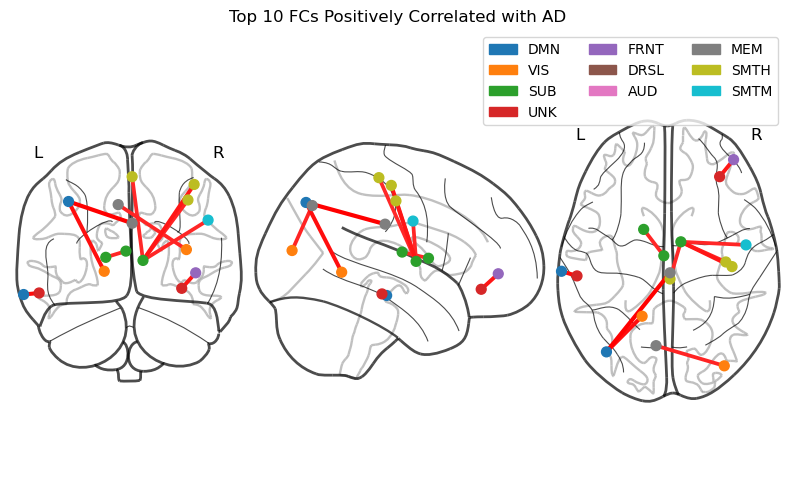

In [71]:
npos = len(pos_roi)
pos_coords = np.zeros((npos, 3))
pos_roi = list(pos_roi)
pos_adj_mat = np.zeros((npos, npos))
pos_colors = [None]*npos
for k,v in pos_adj.items():
    parts = k.split(',')
    r1 = int(parts[0])
    r2 = int(parts[1])
    i1 = pos_roi.index(r1)
    i2 = pos_roi.index(r2)
    pos_adj_mat[i1,i2] = v
    pos_adj_mat[i2,i1] = v
    c1 = rois.iloc[ours2orig[r1]]
    c2 = rois.iloc[ours2orig[r2]]
    pos_coords[i1] = (c1.x, c1.y, c1.z)
    pos_coords[i2] = (c2.x, c2.y, c2.z)
    pos_colors[i1] = network_dct[pos_ntwk[r1]]
    pos_colors[i2] = network_dct[pos_ntwk[r2]]

fig, ax = plt.subplots(1,1,figsize=(10,6))
plotting.plot_connectome(pos_adj_mat, pos_coords, pos_colors, axes=ax)
handles = [mpatches.Patch(color=v, label=k) for k,v in network_dct.items()]
ax.legend(handles=handles, ncol=3)
ax.set_title('Top 10 FCs Positively Correlated with AD')
fig.savefig('/home/anton/Documents/Yale/ADNI/ADTenPositiveConnections.pdf')